In [1]:
!nvidia-smi

Wed Jul  3 20:20:41 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   57C    P0             21W /   85W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.7 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (12 CPUs, 15.8 GB RAM, 418.3/476.7 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow

In [5]:
%cd {HOME}/datasets


[WinError 3] The system cannot find the path specified: '{HOME}/datasets'
c:\Users\kingc\Documents\FPTU_Data_Science_Club


In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="LTaSDVr0pR8BNO8rCLHD")
project = rf.workspace("casanova").project("paper-locsu")
version = project.version(1)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...


In [2]:
import os 
HOME = os.getcwd()
print(HOME)

c:\Users\kingc\Documents\FPTU_Data_Science_Club


In [6]:

%cd {HOME}
#validate the model
!yolo task=segment mode=val model={HOME}/runs/segment/train8/weights/best.pt data={dataset.location}/data.yaml

c:\Users\kingc\Documents\FPTU_Data_Science_Club


Ultralytics YOLOv8.0.196  Python-3.11.7 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

val: Scanning C:\Users\kingc\Documents\FPTU_Data_Science_Club\paper-1\valid\labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
val: Scanning C:\Users\kingc\Documents\FPTU_Data_Science_Club\paper-1\valid\labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:01<00:01,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      

In [8]:
%cd {HOME}
#training the model
!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

c:\Users\kingc\Documents\FPTU_Data_Science_Club


New https://pypi.org/project/ultralytics/8.1.20 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.11.7 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=c:\Users\kingc\Documents\FPTU_Data_Science_Club\paper-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer

In [10]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train10/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true
#test the model

c:\Users\kingc\Documents\FPTU_Data_Science_Club


Ultralytics YOLOv8.0.196  Python-3.11.7 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/20 c:\Users\kingc\Documents\FPTU_Data_Science_Club\paper-1\test\images\104_jpg.rf.4c2a0fa81793055e040045b8f6bac543.jpg: 640x640 1 paper, 15.6ms
image 2/20 c:\Users\kingc\Documents\FPTU_Data_Science_Club\paper-1\test\images\105_jpg.rf.96f93ceaca75327bc30a6d09b1e82c2c.jpg: 640x640 1 paper, 16.0ms
image 3/20 c:\Users\kingc\Documents\FPTU_Data_Science_Club\paper-1\test\images\109_jpg.rf.192b616cba70996469c0e19648ad3240.jpg: 640x640 2 papers, 15.5ms
image 4/20 c:\Users\kingc\Documents\FPTU_Data_Science_Club\paper-1\test\images\117_jpg.rf.2a5135df1109d50b720ee6ca7d67a010.jpg: 640x640 1 paper, 16.5ms
image 5/20 c:\Users\kingc\Documents\FPTU_Data_Science_Club\paper-1\test\images\151_jpg.rf.2a718a7a87e76cfc95a55f36ffd9ade0.jpg: 640x640 1 paper, 18.0ms
image 6/20 c:\Users\kingc\Documents\FPTU_Data_

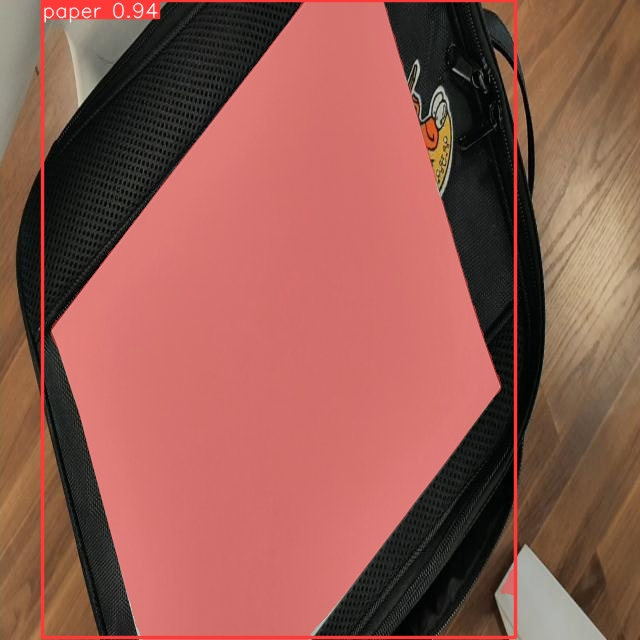

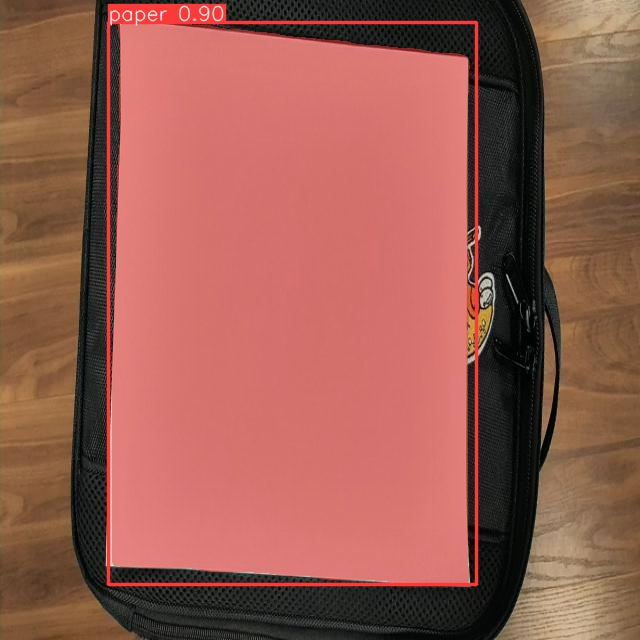

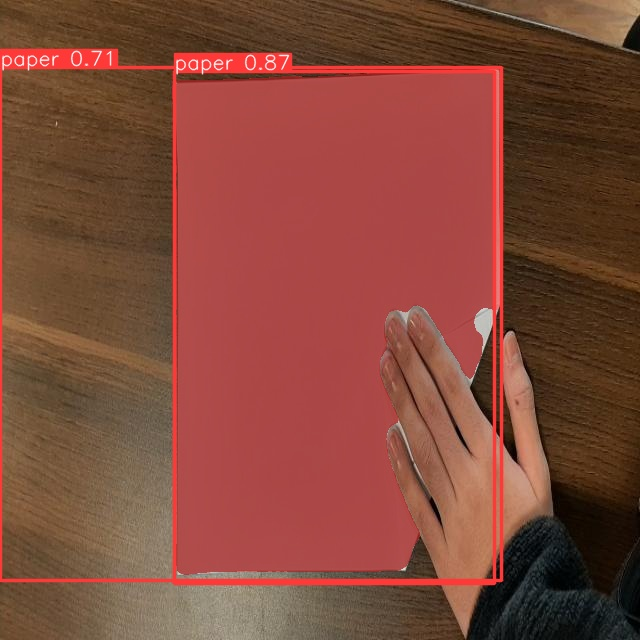

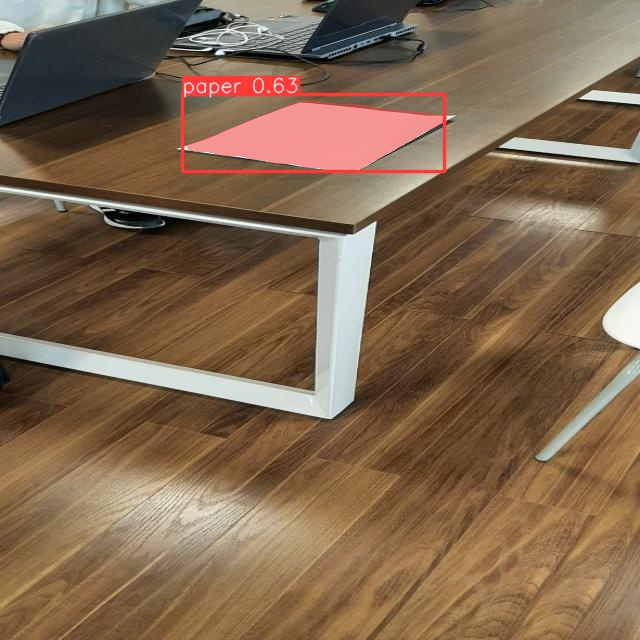

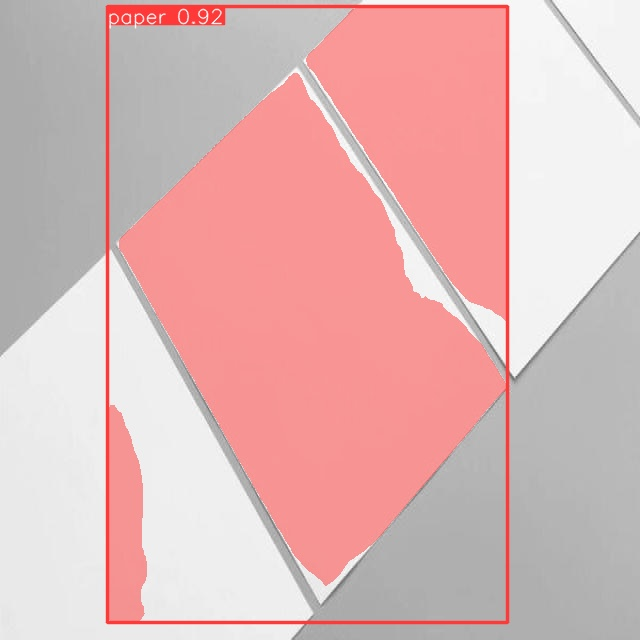

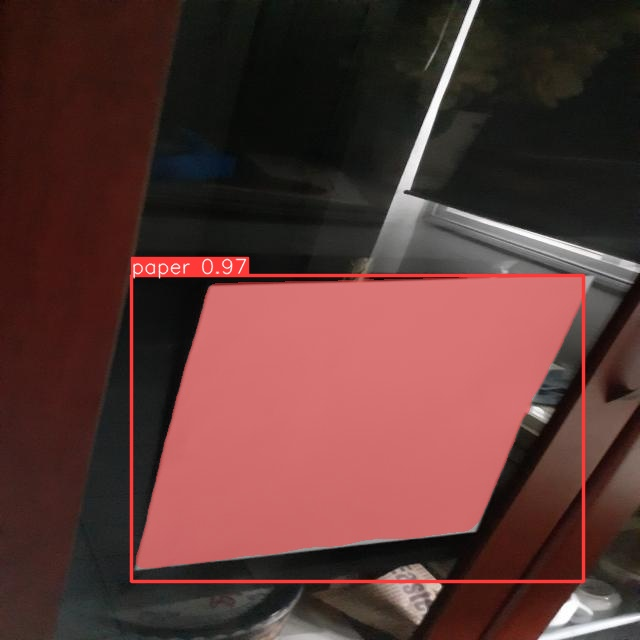

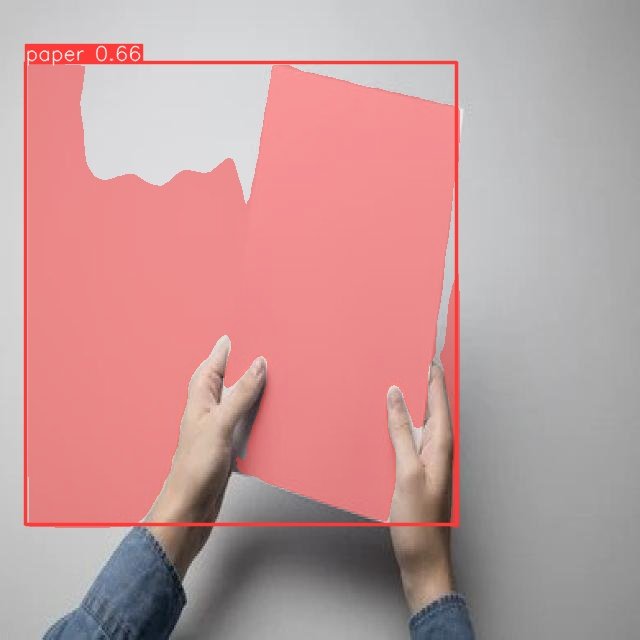

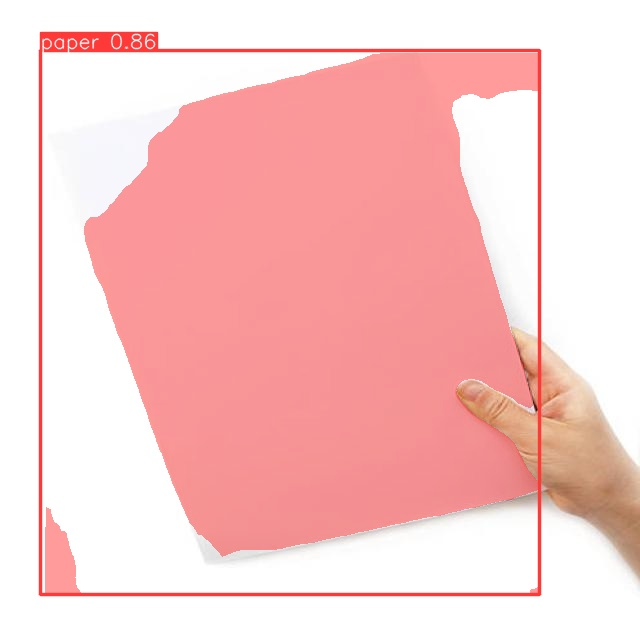

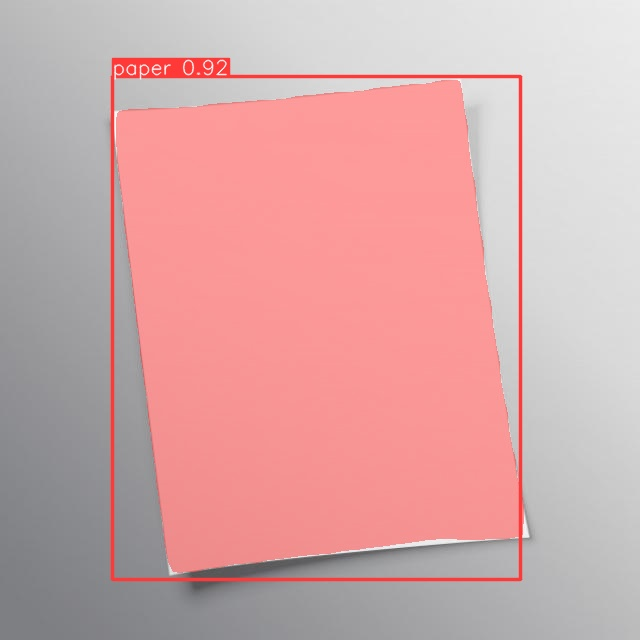

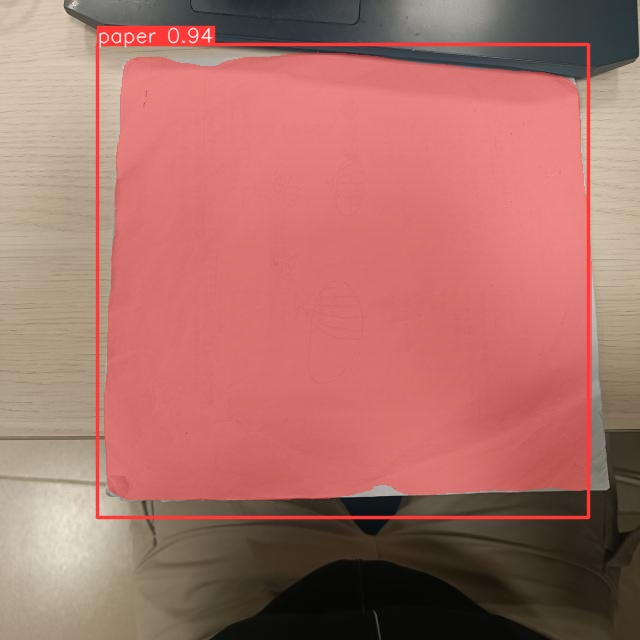

In [12]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:10]:
    display(Image(filename=image_path,height=600))
    print("\n")
#test function the model